In [46]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, SpectralClustering, OPTICS
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

from collections import Counter

import pandas as pd
pd.set_option("display.max_columns", None)
import cartopy.crs as ccrs
TRANSFORM = ccrs.PlateCarree()

from traffic.core import Traffic, Flight

# from sklearn.gaussian_process import GaussianMixture

In [42]:
df = pd.read_parquet("./data/resampled_t_near_ap.parquet", engine="pyarrow")

t = Traffic(df)



NameError: name 'Traffic' is not defined

In [3]:
lat = np.load("./data/latent_.npy")

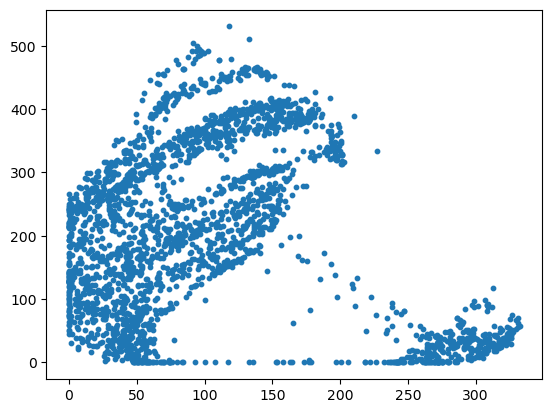

In [7]:
plt.scatter(lat[:, 0], lat[:, 1], s=10)

In [37]:
# for eps in [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1]:
for metric in ["manhattan", "euclidean", "l1", "l2" ]:
    for eps in np.logspace(-1, 1, 100):
        clusters = DBSCAN(eps=eps, min_samples=50, metric=metric).fit_predict(lat)
        # np.unique(clusters)

        # display(plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters))
        if np.unique(clusters).__len__() < 2:
            continue

        print(f"{metric}")
        display(Counter(clusters))
        plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters)
        plt.title(f"{eps}, {metric}")
        plt.show()

l2


Counter({-1: 1932,
         16: 69,
         2: 54,
         9: 53,
         5: 48,
         15: 48,
         10: 45,
         17: 44,
         11: 43,
         4: 42,
         12: 37,
         7: 33,
         14: 31,
         1: 29,
         6: 24,
         0: 22,
         8: 22,
         3: 21,
         13: 20})

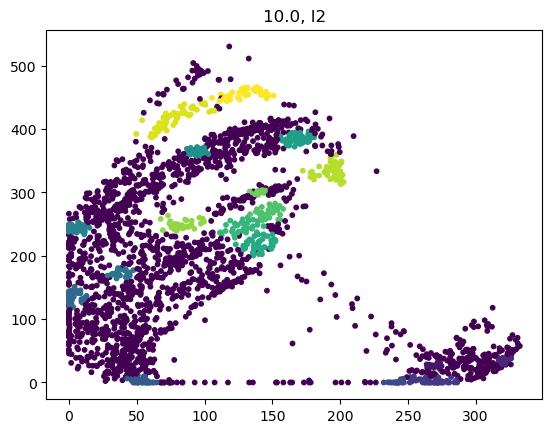

In [50]:
# for eps in [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1]:
# for metric in ["manhattan", "euclidean", "l1", "l2" ]:
    # for eps in np.logspace(-1, 1, 100):
if True:
        clusters = OPTICS(min_samples=20, metric="l2").fit_predict(lat)
        # np.unique(clusters)

        # display(plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters))
        # if np.unique(clusters).__len__() < 2:
        #     continue

        print(f"{metric}")
        display(Counter(clusters))
        plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters)
        plt.title(f"{eps}, {metric}")
        plt.show()

l2


/opt/homebrew/Caskroom/miniforge/base/envs/artefact/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({5: 380, 4: 362, 0: 361, 7: 354, 1: 342, 2: 321, 3: 264, 6: 233})

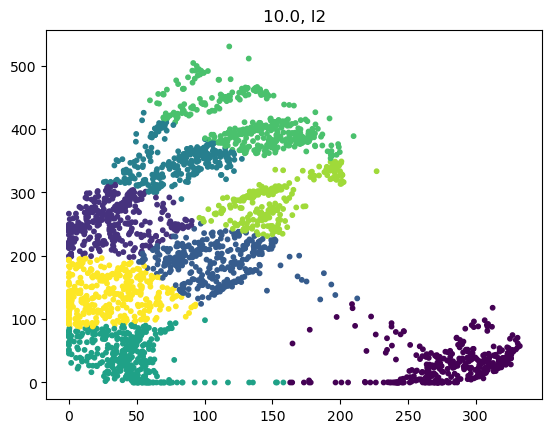

In [40]:
clusters = KMeans(n_clusters=8).fit_predict(lat)
# np.unique(clusters)

# display(plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters))
# if np.unique(clusters).__len__() < 2:
#     continue

print(f"{metric}")
display(Counter(clusters))
plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters)
plt.title(f"{eps}, {metric}")
plt.show()

In [ ]:
# 2 x 4 grid
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 30), subplot_kw={"projection": TRANSFORM})


for idx, cluster in enumerate(sorted(np.unique(clusters))):
    ids = t_tsne.query(f"cluster == {cluster}").data.flight_id.unique()

    with plt.style.context("traffic"):
        # ax = fig.add_subplot(111, projection=TRANSFORM)
        # ax = fig.add_subplot(111, projection=TRANSFORM)
        ax = axs[idx // 2, idx % 2]
        for flight in t_tsne[ids]:
            # flight.plot(ax=ax, color=color_map[cluster], transform=TRANSFORM, alpha=0.1, label=cluster)
            flight.plot(ax=ax, color=color_map[cluster], alpha=0.1, label=cluster)
        ax.set_title(f"Cluster {cluster}")
plt.show()

In [18]:

Counter(clusters)

Counter({-1: 2513,
         3: 14,
         4: 14,
         2: 12,
         1: 11,
         8: 9,
         0: 7,
         5: 6,
         7: 6,
         9: 6,
         6: 5,
         10: 5,
         11: 5,
         12: 4})

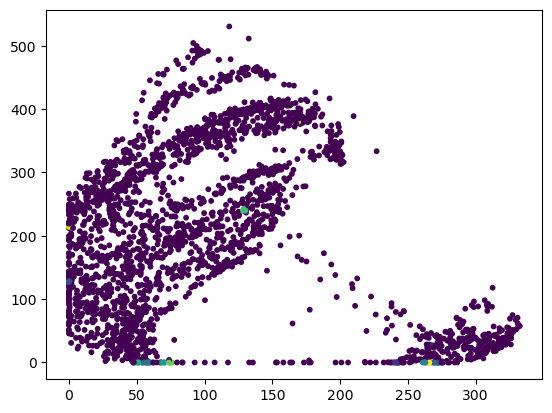

In [17]:
plt.scatter(lat[:, 0], lat[:, 1], s=10, c=clusters)